<h1 style="background-color:#0071BD;color:white;text-align:center;padding-top:0.8em;padding-bottom: 0.8em">
Gaussian Mixture Models
</h1>

Christian Bauckhage: "Expectation Maximization for Gaussian Mixture Models", Project, Dec 2017 
([Download from ReseachGate / lecture-14-add-on](https://www.researchgate.net/project/lectures-on-pattern-recognition/update/5a3e23734cde266d587d382f))

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy.linalg as la
import numpy.random as rnd

In [2]:
axbg = '#f0f0f0'
blu = '#0059ff'
ora = '#ffa500'
xstl = {'ls':'', 'marker':'o', 'c':blu, 'ms':7, 'alpha':0.5}
zstl = {'ls':'', 'marker':'s', 'c':ora, 'ms':10, 'alpha':0.5}
cols = ['#00ffbf', '#bf00ff', '#ffbf00', '#000000'
        '#ff0000', '#00ff00', '#0000ff', '#ffff00']

In [3]:
def setAxes(axs, cart):
    if not cart:
        axs.set_axis_off()
    else:
        axs.spines['left'].set_position('zero')
        axs.spines['left'].set_zorder(1)
        axs.spines['bottom'].set_position('zero')
        axs.spines['bottom'].set_zorder(1)
        axs.spines['right'].set_visible(False)
        axs.spines['top'].set_visible(False)
        axs.xaxis.set_ticks_position('bottom')
        axs.yaxis.set_ticks_position('left')
        axs.tick_params(direction='out')

In [4]:
def plot2DGMM(X, M=None, model=None, bgcol=axbg, aspect=True, cart=False,
             lims=None, fname=None):

    fig = plt.figure()
    fig.patch.set_facecolor(bgcol)
    axs = fig.add_subplot(111, facecolor=bgcol)
    if aspect:
        axs.set_aspect(aspect='equal')

    setAxes(axs, cart)
    
    axs.plot(X[0,:], X[1,:], 'o', color='k', ms=7, alpha=0.25)
    
    if M is not None:
        axs.plot(M[0,:], M[1,:], 's', color=blu, ms=7, alpha=0.75)

    if model is not None:
        X, Y, Z = model
        axs.contour(X, Y, Z, 17, cmap=cm.viridis, alpha=0.75)

    if lims is not None:
        axs.set_xlim(lims[0],lims[1])
        axs.set_ylim(lims[2],lims[3])
    else:
        xmin = X[0].min() - 1
        xmax = X[0].max() + 1
        ymin = X[1].min() - 1
        ymax = X[1].max() + 1
        axs.set_xlim(xmin, xmax)
        axs.set_ylim(ymin, ymax)
    
    if fname is None:
        plt.show()
    else:
        writeFigure(fig, fname)
    plt.close()

<font size='5'><b>MacQueen</b></font>

In [5]:
def MacQueen(X, k):
    n,m = X.shape
    
    M = np.copy(X[:k])
    N = np.ones(k)
    
    for j in range(k,n):
        i = np.argmin(np.sum((M - X[j])**2,axis=1))
        N[i] += 1
        M[i] +-1./N[i] * (X[j] - M[i])
        
        return M

In [6]:
def pGMM_2d(x, y, ws, Ms, Ss):
    k,m = Ms.shape
    
    inv = []
    nrm = []
    for i in range(k):
        inv.append(la.inv(Ss[:,:,i]))
        nrm.append(1/(np.sqrt(la.det(2*np.pi*Ss[:,:,i]))))
        
    h1 = []
    h2 = []
    h3 = []
    for i in range(k):
        a = x - Ms[i,0]
        b = y - Ms[i,1]
        h1.append(inv[i][0,0]*a + inv[i][0,1]*b)
        h2.append(inv[i][1,0]*a + inv[i][1,1]*b)
        h3.append(h1[i] * a + h2[i] * b)
        
    p = np.zeros_like(x)
    for i in range(k):
        p += ws[i] * nrm[i] * np.exp(-0.5 * h2[i])
        
    return p

In [7]:
def estimate_p_ij(X, w, m, S):
    Inv = la.inv(S)
    nrm = 1 / np.sqrt(la.det(2*np.pi*S))
    
    D = X-m
    p = np.sum(np.multiply(np.dot(D, Inv), D), axis=1)
    
    return w * nrm * np.exp(-0.5 * p)

<font size='5'><b>Gaussion Mixture Models</b><font>

In [8]:
n1 = 30; m1 = np.array([0, 1]); S1 = np.array([[0.5, 0.1], [0.1, 0.5]])
n2 = 50; m2 = np.array([5, 2]); S2 = np.array([[1.0, 1.5], [1.5, 4.0]])
n3 = 80; m3 = np.array([1, 6]); S3 = np.array([[3.0, 0.0], [0.0, 1.0]])

In [9]:
X1 = rnd.multivariate_normal(m1, S1, n1)
X2 = rnd.multivariate_normal(m2, S2, n2)
X3 = rnd.multivariate_normal(m3, S3, n3)

In [10]:
X = np.vstack((X1,X2,X3))
rnd.shuffle(X)

In [11]:
n = n1+n2+n3
k = 3
w = np.ones(k)/ k
M = MacQueen(X, k)
S = np.dstack([np.array([[1., 0.], [0., 1.]]) for i in range(k)])

In [12]:
lims = [X[:,0].min()-1, X[:,0].max()+1, X[:,1].min()-1, X[:,1].max()+1]

In [13]:
dx = lims[1]-lims[0]
dy = lims[3]-lims[2]
nx = 500
ny =int(nx * dy/dx)

In [14]:
xs, ys = np.meshgrid(np.linspace(lims[0], lims[1], nx),
                     np.linspace(lims[2], lims[3], ny))

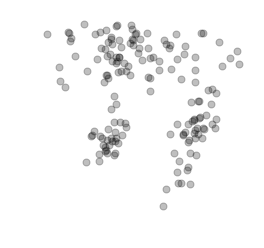

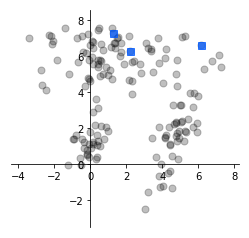

In [15]:
fname = 'gmmXmpl-9-'

plot2DGMM(X.T, lims=lims, cart=False, bgcol='w')
plot2DGMM(X.T, M=M.T, lims=lims, cart=True, bgcol='w')

# plot2DGMM(X.T, lims=lims, cart=True, bgcol='w', fname=fname+'data.pdf')
# plot2DGMM(X.T, M=M.T, lims=lims, cart=True, bgcol='w', fname=fname+'means.pdf')

In [16]:
wnew = np.copy(w)
Mnew = np.copy(M)
Snew = np.copy(S)

Z = np.zeros((n,k))

0


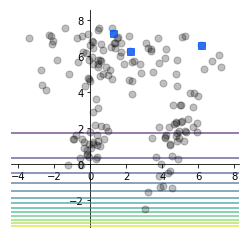

[[ 3.75199804  1.83626227]
 [ 1.83626227 18.09393348]]
[[4.29502395 1.69205337]
 [1.69205337 2.42932337]]
[[ 1.32306384  3.32635791]
 [ 3.32635791 14.52739009]]
1


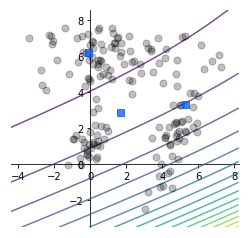

[[3.61307102 0.81260416]
 [0.81260416 6.4404163 ]]
[[2.7321905  0.14189484]
 [0.14189484 0.92573769]]
[[0.81054931 1.52231395]
 [1.52231395 5.57808837]]
2


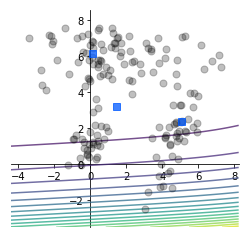

[[3.57337945 1.59826602]
 [1.59826602 5.73064297]]
[[2.83682786 0.01481244]
 [0.01481244 0.74128421]]
[[0.78494073 1.44140535]
 [1.44140535 4.60281844]]
3


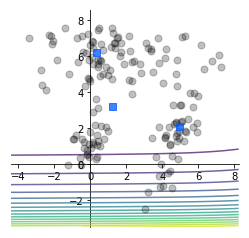

[[3.33387036 2.10994097]
 [2.10994097 5.29881998]]
[[ 3.06969454 -0.05792627]
 [-0.05792627  0.67661574]]
[[0.81012198 1.46736051]
 [1.46736051 4.20101088]]
4


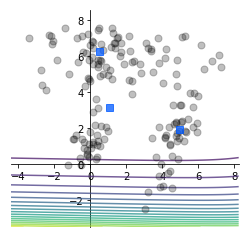

[[2.98561942 2.25802056]
 [2.25802056 4.99710561]]
[[ 3.36908393 -0.07232139]
 [-0.07232139  0.66393934]]
[[0.82607903 1.47279516]
 [1.47279516 4.00080188]]
5


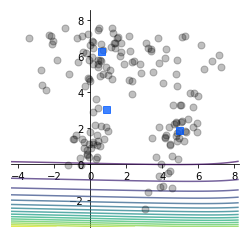

[[2.53124159 2.16668048]
 [2.16668048 4.69721313]]
[[ 3.72790872 -0.03826596]
 [-0.03826596  0.68681637]]
[[0.83002813 1.460949  ]
 [1.460949   3.92135074]]


In [17]:
for t in range(6):
    print (t) 
    p = pGMM_2d(xs, ys, w, M, S).reshape(ny,nx)
    plot2DGMM(X.T, M=M.T, model=[xs,ys,p], lims=lims, cart=True,
             bgcol='w')
              #, fname=fname+'round-%d.pdf' % t)
    
    for i in range(k):
        Z[:,i] = estimate_p_ij(X, w[i], M[i], S[:,:,i])
    Z /= np.sum(Z, axis=1).reshape(n,1)
    
    for i in range(k):
        Mnew[i] = np.sum(Z[:,i]*X.T, axis=1) / np.sum(Z[:,i])
        
        D = X - M[i]
        Snew[:,:,i] = np.dot(Z[:,i]*D.T, D) / np.sum(Z[:,i])
        print (Snew[:,:,i])
        
        wnew[i] = np.sum(Z[:,i]) / n
    
    w = np.copy(wnew)
    M = np.copy(Mnew)
    S = np.copy(Snew)

<table style="width:100%">
  <tr>
      <td colspan="1" style="text-align:left;background-color:#0071BD;color:white">
        <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">
            <img alt="Creative Commons License" style="border-width:0;float:left;padding-right:10pt"
                 src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" />
        </a>
        &copy; C. Bauckhage and O. Cremers<br/>
        Licensed under a 
        <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/" style="color:white">
            CC BY-NC 4.0
        </a>.
      </td>
      <td colspan="2" style="text-align:left;background-color:#66A5D1">
          <b>Acknowledgments:</b>
          This material was prepared within the project
          <a href="http://www.b-it-center.de/b-it-programmes/teaching-material/p3ml/" style="color:black">
              P3ML
          </a> 
          which is funded by the Ministry of Education and Research of Germany (BMBF)
          under grant number 01/S17064. The authors gratefully acknowledge this support.
      </td>
  </tr>
</table>